1.4142135623730951
10910.884


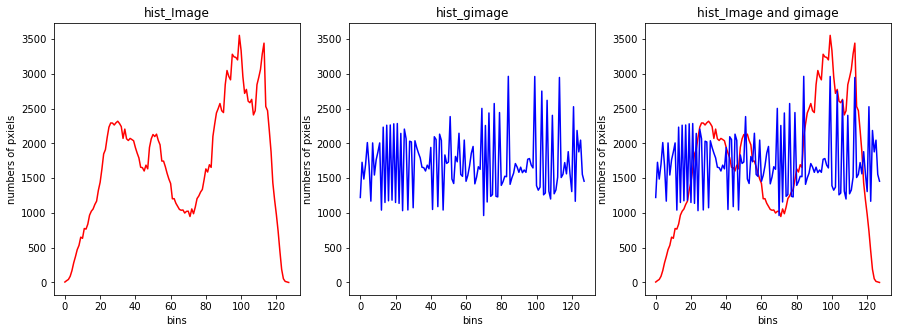

In [17]:
import cv2 as cv
import matplotlib.pyplot as plt
import copy
import numpy as np
import math

# cv2.calcHist(images, channels, mask, histSize, ranges)
# images 要计算直方图的原始图像
# channels 通道，[0]:灰度直方图，[0,1,2]BGR彩色直方图
# mask 要为某个蒙版像素计算直方图，没有可设置为None
# histSize x轴要分的bins个数[32,32,32]，每个通道分为32个区间
# range 可能的像素范围[0,256] 因为calHist不包含后者

Image = cv.imread('data/shenzhen_gray.bmp', cv.IMREAD_GRAYSCALE)
cimage = copy.deepcopy(Image)
gimage = cv.equalizeHist(cimage)

hist_cimage = cv.calcHist([cimage], [0], None, [128], [0, 256])
hist_gimage = cv.calcHist([gimage], [0], None, [128], [0, 256])

#print(hist_cimage)
d = np.sqrt(np.sum(np.power(hist_cimage - hist_gimage, 2)))

print(d)
fig = plt.figure(figsize=(15, 5))
fig.set(alpha = 0.2)
ax1 = fig.add_subplot(131)
plt.plot(hist_cimage, color = 'red')
plt.title("hist_Image")
plt.xlabel("bins")
plt.ylabel("numbers of pxiels")

ax2 = fig.add_subplot(132, sharey = ax1)
plt.plot(hist_gimage, color = 'blue')
plt.title("hist_gimage")
plt.xlabel("bins")
plt.ylabel("numbers of pxiels")

ax3 = fig.add_subplot(133, sharey = ax1)
plt.plot(hist_cimage, color = 'red')
plt.plot(hist_gimage, color = 'blue')
plt.title("hist_Image and gimage")
plt.xlabel("bins")
plt.ylabel("numbers of pxiels")
plt.show()

